# Web Scraping and Cleaning in Python

This is a very basic web scraping project using BeautifulSoup. The table used to extract data can be found [here](https://docs.google.com/spreadsheets/d/1ZaLWbzOeFXAJWte6p8pPy745KLyAH0RCA1YgGgNrto0/htmlview#). 

#### Import libraries

In [272]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path 

#### Page access request

In [273]:
#Create a URL object 
url = 'https://docs.google.com/spreadsheets/d/1ZaLWbzOeFXAJWte6p8pPy745KLyAH0RCA1YgGgNrto0/htmlview#'
#Create object page
page = requests.get(url)

In [274]:
#parser-lxml = Change html to Python friendly format
#Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')

#### Find the table

Using inspect page we found that the table tag doesn't have an id. 

In [275]:
#Find previous element with id
prev = soup.find('div',{'id':'1637882187'})

In [276]:
table_element = prev.find_next('table')

#### Copy text fields into a list

In [277]:
#Create list
table_data=[]
#Skip first row that contains column reference
for t in table_element.find_all('tr')[1:]:
    data = t.find_all('td')
    table_row=[]
    for d in data[:5]:
        table_row.append(d.text)
    table_data.append(table_row)

#### Convert the list data into a dataframe

In [278]:
col = ['Company', 'City', 'County', 'Type', 'Route']
jobs = pd.DataFrame(table_data[1:], columns=col)

In [279]:
jobs.head()

,Company,City,County,Type,Route
0,,,,,
1,3-D Matrix UK Limited,London,,Worker (A rating),Intra-company Routes
2,3i plc,London,,Worker (A rating),Intra-company Routes
3,4 GLOBAL CONSULTING LIMITED,LONDON,,Worker (A rating),Intra-company Routes
4,Amana Trust,Romford,Essex,Temporary Worker (A (SME+)),Voluntary Workers


#### Handle missing values

In [280]:
#Assign empty cells with Nan
jobs = jobs.apply(lambda x: x.str.strip()).replace('', np.nan)
#Remove empty rows
jobs = jobs.dropna(how='all')

In [281]:
jobs.head(20)

,Company,City,County,Type,Route
1,3-D Matrix UK Limited,London,NaN,Worker (A rating),Intra-company Routes
2,3i plc,London,NaN,Worker (A rating),Intra-company Routes
3,4 GLOBAL CONSULTING LIMITED,LONDON,NaN,Worker (A rating),Intra-company Routes
4,Amana Trust,Romford,Essex,Temporary Worker (A (SME+)),Voluntary Workers
5,Amana Trust,Romford,Essex,Worker (A (SME+)),T2 Minister of Religion
6,Amana Trust,Romford,Essex,Temporary Worker (A (SME+)),Religious Worker
7,Amande Concerts UK,Watford,Hertfordshire,Temporary Worker (A rating),Creative & Sporting
8,Amane Advisors Ltd,Bladon,Oxfordshire,Worker (A rating),Skilled Worker
9,Amano Enzyme Europe Limited,Chipping Norton,Oxfordshire,Worker (A rating),Skilled Worker
10,Amano Enzyme Europe Limited,Chipping Norton,Oxfordshire,Worker (A rating),Intra-company Routes


#### Normalise data

First two columns look like they were manually entered. Whereas, the third - fifth columns are categories.

In [282]:
#Normalise Town/city column
#Convert to lowercase
jobs['City'] = jobs['City'].str.lower()
#Remove special characters
jobs['City'] = jobs['City'].str.replace('\W', ' ')

/var/folders/nv/rj5bngn10wz2h5x7q69scg5w0000gp/T/ipykernel_60761/3076232182.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs['City'] = jobs['City'].str.replace('\W', ' ')


In [283]:
jobs.head(20)

,Company,City,County,Type,Route
1,3-D Matrix UK Limited,london,NaN,Worker (A rating),Intra-company Routes
2,3i plc,london,NaN,Worker (A rating),Intra-company Routes
3,4 GLOBAL CONSULTING LIMITED,london,NaN,Worker (A rating),Intra-company Routes
4,Amana Trust,romford,Essex,Temporary Worker (A (SME+)),Voluntary Workers
5,Amana Trust,romford,Essex,Worker (A (SME+)),T2 Minister of Religion
6,Amana Trust,romford,Essex,Temporary Worker (A (SME+)),Religious Worker
7,Amande Concerts UK,watford,Hertfordshire,Temporary Worker (A rating),Creative & Sporting
8,Amane Advisors Ltd,bladon,Oxfordshire,Worker (A rating),Skilled Worker
9,Amano Enzyme Europe Limited,chipping norton,Oxfordshire,Worker (A rating),Skilled Worker
10,Amano Enzyme Europe Limited,chipping norton,Oxfordshire,Worker (A rating),Intra-company Routes


#### Save dataset

In [284]:
filepath = Path('jobs.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
jobs.to_csv(filepath)

#### Explore data

In [285]:
jobs.describe()

,Company,City,County,Type,Route
count,42842,42842,16872,42841,42842
unique,33643,2655,917,8,11
top,Crown Dependencies R350 AWv5,london,London,Worker (A rating),Skilled Worker
freq,10,17741,1053,39767,30523


#### Cities

In [286]:
top_cities = jobs['City'].value_counts()[:10]
top_cities

london        17741
manchester      648
birmingham      603
cambridge       497
reading         460
edinburgh       443
bristol         437
glasgow         373
leeds           323
oxford          317
Name: City, dtype: int64

#### Type of employment

In [287]:
jobs['Route'].value_counts()

Skilled Worker                    30523
Intra-company Routes               8098
Creative & Sporting                1320
T2 Minister of Religion             975
Religious Worker                    788
Voluntary Workers                   660
T2 Sportsperson                     303
Government Authorised Exchange      149
International Agreements             15
Tier 2 General                        6
Seasonal Worker                       5
Name: Route, dtype: int64

#### Finding top companies based on location and Route

In [288]:
top_company_df = jobs[jobs['City'].isin(top_cities.index)]
top_company_df = top_company_df[top_company_df['Route'] == 'Skilled Worker']
top_company_df = top_company_df[['Company','City']]
top_company_df = top_company_df.drop_duplicates(subset=['Company', 'City'], keep=False)
top_company_df

,Company,City
15,Amaris Hospitality Limited,glasgow
51,AMBULANCE SCOTLAND,glasgow
60,Amcor Europe Group Management,bristol
108,Amgen Limited,cambridge
125,Amigo Technology Limited,birmingham
...,...,...
42831,Zxtech Ltd,london
42833,Williams and Barry Ltd,edinburgh
42834,Williams College Oxford Programme,oxford
42841,ZZ&D LtD,london


In [289]:
top_cities_new = top_company_df['City'].value_counts()
top_cities_new

london        13240
manchester      438
birmingham      400
cambridge       368
reading         302
edinburgh       297
bristol         288
oxford          234
glasgow         227
leeds           219
Name: City, dtype: int64

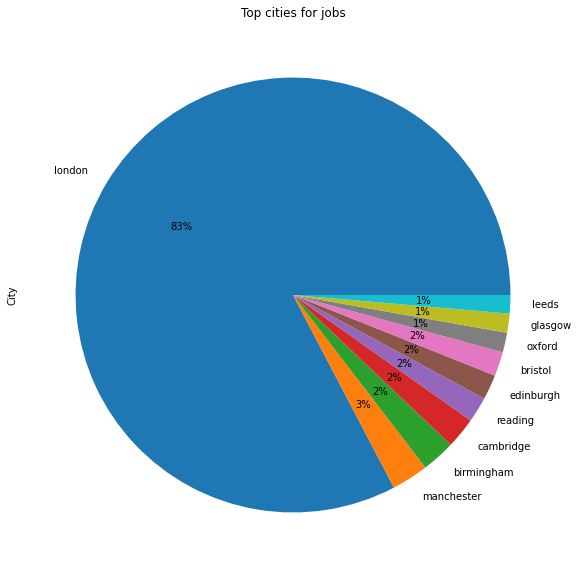

In [290]:
plt.figure(figsize=(10,10))
top_cities_new.plot(kind='pie', y='values', autopct='%1.0f%%', title='Top cities for jobs')
plt.show()

In [291]:
top_companies_london = top_company_df[top_company_df['City']=='london']
top_companies_london

,Company,City
10746,@ Home Accommodation Services Ltd,london
10749,01 ACCOUNTING SERVICES LTD,london
10754,012 Global Ltd,london
10755,10 GROUP LTD T/A THE 10 GROUP,london
10756,100 SHAPES LTD,london
...,...,...
42828,Zvilo Limited,london
42829,Zwift UK Limited,london
42831,Zxtech Ltd,london
42841,ZZ&D LtD,london
